In [1]:
#Importing Required Libraries

In [2]:
import numpy as np 
from numpy import nan
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import time
import sys
import os
import datetime
import pickle
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score


In [3]:
# Data Generation - Fetching, Cleaning & Preparing Data

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()
bucket='awssagemaker'
data_train_key = 'train.csv'
data_location_train = 's3://{}/{}'.format(bucket, data_train_key)


train = pd.read_csv(data_location_train, dtype = dtypes)

In [6]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [7]:
print(train.shape)

(8921483, 83)


In [8]:
train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

Text(0.5, 1.0, 'HasDetections(target)')

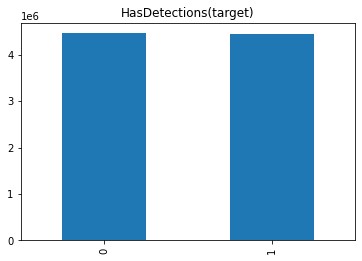

In [9]:
train['HasDetections'].value_counts().plot.bar()
plt.title('HasDetections(target)')

In [10]:
stats = []
for col in train.columns:
    stats.append((col, train[col].dtype, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
28,PuaMode,category,2,99.974119,99.974119
41,Census_ProcessorClass,category,3,99.589407,99.589407
8,DefaultBrowsersIdentifier,float16,1730,95.141637,95.141637
68,Census_IsFlightingInternal,float16,2,83.044030,83.044030
52,Census_InternalBatteryType,category,78,71.046809,71.046809
...,...,...,...,...,...
1,ProductName,category,6,0.000000,98.935569
45,Census_HasOpticalDiskDrive,int8,2,0.000000,92.281272
54,Census_OSVersion,category,469,0.000000,15.845202
55,Census_OSArchitecture,category,3,0.000000,90.858045


In [12]:
na_rate_threshold = 0.9

In [13]:
unbalanced_feature_rate_threshold = 0.9

In [14]:
final_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        final_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        final_cols.remove(col)

In [15]:
train_final = train[final_cols]

In [16]:
train_final.shape

(8921483, 57)

In [17]:
train_final.head(5)

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,...,NaN,NaN,628.0,36144.0,0,NaN,0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,...,NaN,NaN,628.0,57858.0,0,NaN,0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,...,NaN,NaN,142.0,52682.0,0,NaN,0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,...,NaN,NaN,355.0,20050.0,0,NaN,0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,...,0.0,0.0,355.0,19844.0,0,0.0,0,0.0,1.0,1


### EDA

#### Which ‘OsPlatformSubRelease’ (windows version -7/8/10 etc.) has the maximum number of malware detections?

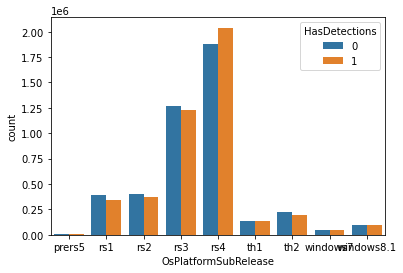

In [18]:
sns.countplot(x='OsPlatformSubRelease', hue='HasDetections',data=train)
plt.show()

#### Is a gamer more prone to malware attacks than a normal user?

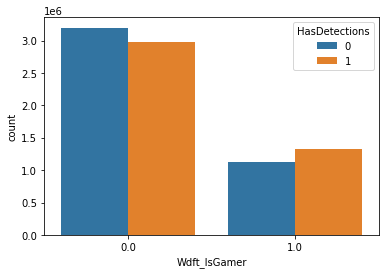

In [19]:
sns.countplot(x='Wdft_IsGamer', hue='HasDetections',data=train)
plt.show()

#### How does malware detection vary different number of Anti Virus Product

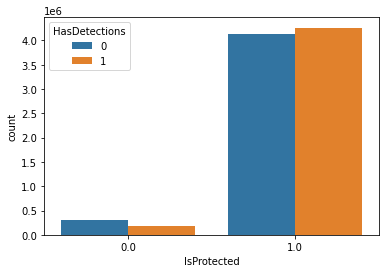

In [20]:
sns.countplot(x='IsProtected', hue='HasDetections',data=train)
plt.show()

#### AVProductsInstalled 

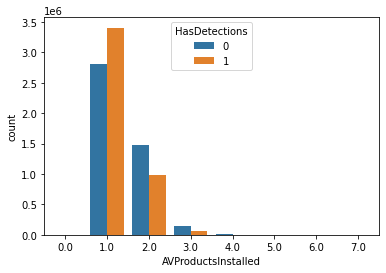

In [21]:
sns.countplot(x='AVProductsInstalled', hue='HasDetections',data=train)
plt.show()

#### AVProductsEnabled 

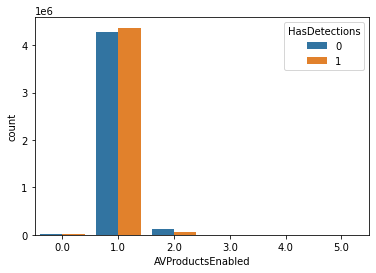

In [22]:
sns.countplot(x='AVProductsEnabled', hue='HasDetections',data=train)
plt.show()

In [23]:
## assigning categorical features

In [24]:
categorical_features = [
        'ProductName',                                          
        'EngineVersion',                                        
        'AppVersion',                                           
        'AvSigVersion',                                         
        'Platform',                                             
        'Processor',                                            
        'OsVer',                                                
        'OsPlatformSubRelease',                                 
        'OsBuildLab',                                           
        'SkuEdition',                                           
        'SmartScreen',                                          
        'Census_MDC2FormFactor',                                
        'Census_DeviceFamily',                                  
        'Census_PrimaryDiskTypeName',                           
        'Census_ChassisTypeName',                               
        'Census_PowerPlatformRoleName',                         
        'Census_OSVersion',                                     
        'Census_OSArchitecture',                                
        'Census_OSBranch',                                      
        'Census_OSEdition',                                     
        'Census_OSSkuName',                                     
        'Census_OSInstallTypeName',                             
        'Census_OSWUAutoUpdateOptionsName',                     
        'Census_GenuineStateName',                              
        'Census_ActivationChannel',                             
        'Census_FlightRing']

In [25]:
def plot_category_percent_of_target(col):
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    cat_percent = train[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = train[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:20]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

    for i, p in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=20)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.show()

#### Percentage of Has detections os platform wise

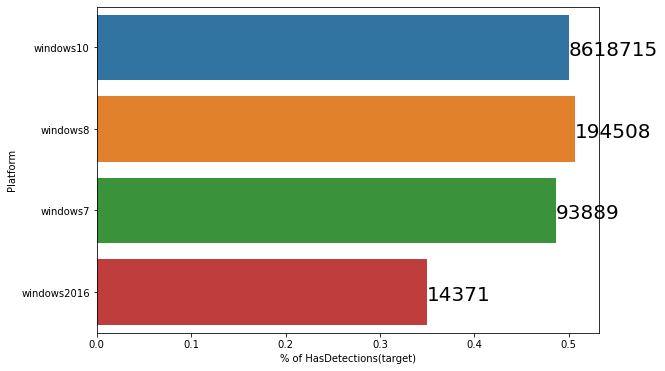

In [26]:
col = categorical_features[4]
plot_category_percent_of_target(col)

In [27]:
## assigning numerical features

In [28]:
numeric_features = [
        'IsBeta',                                               
        'RtpStateBitfield',                                     
        'IsSxsPassiveMode',                                     
        'DefaultBrowsersIdentifier',                            
        'AVProductStatesIdentifier',                            
        'AVProductsInstalled',                                  
        'AVProductsEnabled',                                    
        'HasTpm',                                               
        'CountryIdentifier',                                    
        'CityIdentifier',                                       
        'OrganizationIdentifier',                               
        'GeoNameIdentifier',                                    
        'LocaleEnglishNameIdentifier',                          
        'OsBuild',                                              
        'OsSuite',                                              
        'IsProtected',                                          
        'AutoSampleOptIn',                                      
        'SMode',                                                
        'IeVerIdentifier',                                      
        'Firewall',                                             
        'UacLuaenable',                                         
        'Census_OEMNameIdentifier',                             
        'Census_OEMModelIdentifier',                            
        'Census_ProcessorCoreCount',                            
        'Census_ProcessorManufacturerIdentifier',               
        'Census_ProcessorModelIdentifier',                      
        'Census_PrimaryDiskTotalCapacity',                      
        'Census_SystemVolumeTotalCapacity',                     
        'Census_HasOpticalDiskDrive',                           
        'Census_TotalPhysicalRAM',                              
        'Census_InternalPrimaryDiagonalDisplaySizeInInches',    
        'Census_InternalPrimaryDisplayResolutionHorizontal',    
        'Census_InternalPrimaryDisplayResolutionVertical',      
        'Census_InternalBatteryNumberOfCharges',                
        'Census_OSBuildNumber',                                 
        'Census_OSBuildRevision',                               
        'Census_OSInstallLanguageIdentifier',                   
        'Census_OSUILocaleIdentifier',                          
        'Census_IsPortableOperatingSystem',                     
        'Census_IsFlightsDisabled',                             
        'Census_ThresholdOptIn',                                
        'Census_FirmwareManufacturerIdentifier',                
        'Census_FirmwareVersionIdentifier',                     
        'Census_IsSecureBootEnabled',                           
        'Census_IsWIMBootEnabled',                              
        'Census_IsVirtualDevice',                               
        'Census_IsTouchEnabled',                                
        'Census_IsPenCapable',                                  
        'Census_IsAlwaysOnAlwaysConnectedCapable',              
        'Wdft_IsGamer',                                         
        'Wdft_RegionIdentifier',                                
]

In [29]:
def plot_category_percent_of_target_for_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(17, 8))
    cat_percent = train[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = train[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:20]
    cat_percent[col] = cat_percent[col].astype('category')
    sns.barplot(ax=ax[0], x='HasDetections', y=col, data=cat_percent,  order=cat_percent[col])

    for i, p in enumerate(ax[0].patches):
        ax[0].annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=20)

    ax[0].set_title('Barplot sorted by count', fontsize=20)

    sns.barplot(ax=ax[1], x='HasDetections', y=col, data=cat_percent)
    for i, p in enumerate(ax[0].patches):
        ax[1].annotate('{}'.format(cat_percent['count'].sort_index().values[i]), (0, p.get_y()+0.6), fontsize=20)
    ax[1].set_title('Barplot sorted by index', fontsize=20)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.subplots_adjust(wspace=0.5, hspace=0)
    plt.show()

def plot_kde_hist_for_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(13, 7))
    sns.kdeplot(train.loc[train['HasDetections'] == 0, col], ax=ax[0], label='NoDetection(0)')
    sns.kdeplot(train.loc[train['HasDetections'] == 1, col], ax=ax[0], label='HasDetection(1)')

    train.loc[train['HasDetections'] == 0, col].hist(ax=ax[1], bins=100)
    train.loc[train['HasDetections'] == 1, col].hist(ax=ax[1], bins=100)

    plt.suptitle(col, fontsize=30)
    ax[0].set_yscale('log')
    ax[0].set_title('KDE plot')
    
    ax[1].set_title('Histogram')
    ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])
    ax[1].set_yscale('log')
    plt.show()

#### Presence of TPM (Trusted Platform Module) result in better detection of Malware?

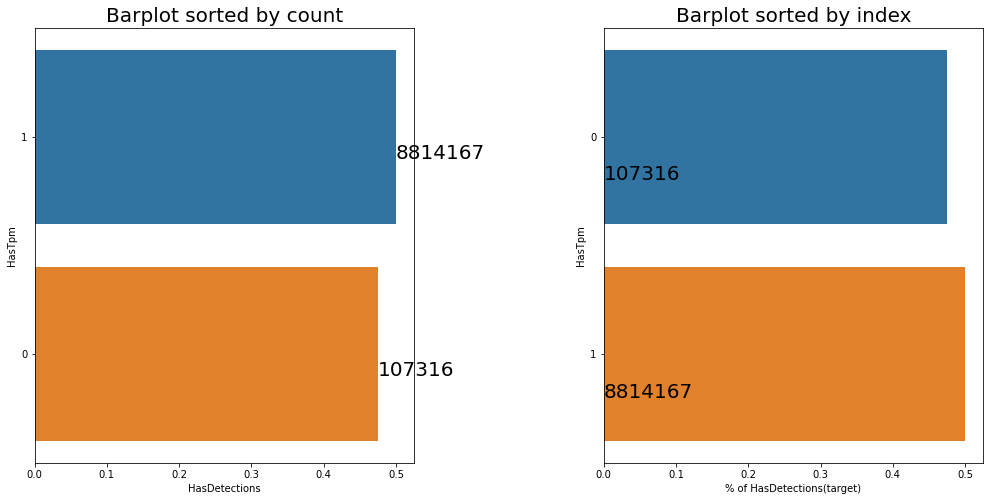

In [30]:
col = numeric_features[7]

# plot_kde_hist_for_numeric(col)
plot_category_percent_of_target_for_numeric(col)

#### RAM-type (Census_TotalPhysicalRAM) is present in most computer.Is there any RAM type which is very prone to malware attacks?

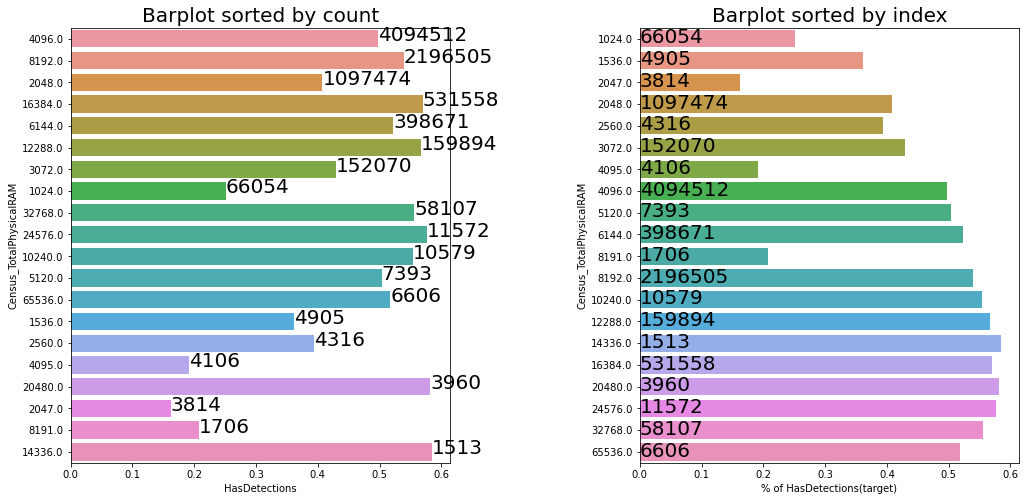

In [31]:
col = numeric_features[29]

# plot_kde_hist_for_numeric(col)
plot_category_percent_of_target_for_numeric(col)

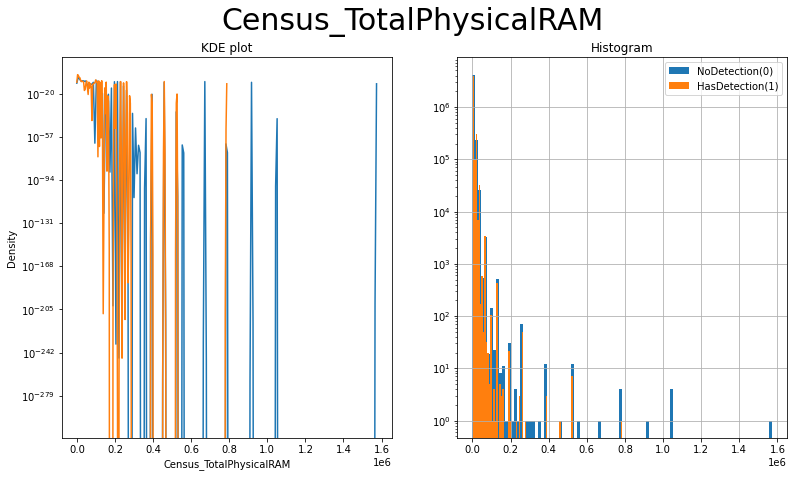

In [32]:
col = numeric_features[29]

plot_kde_hist_for_numeric(col)


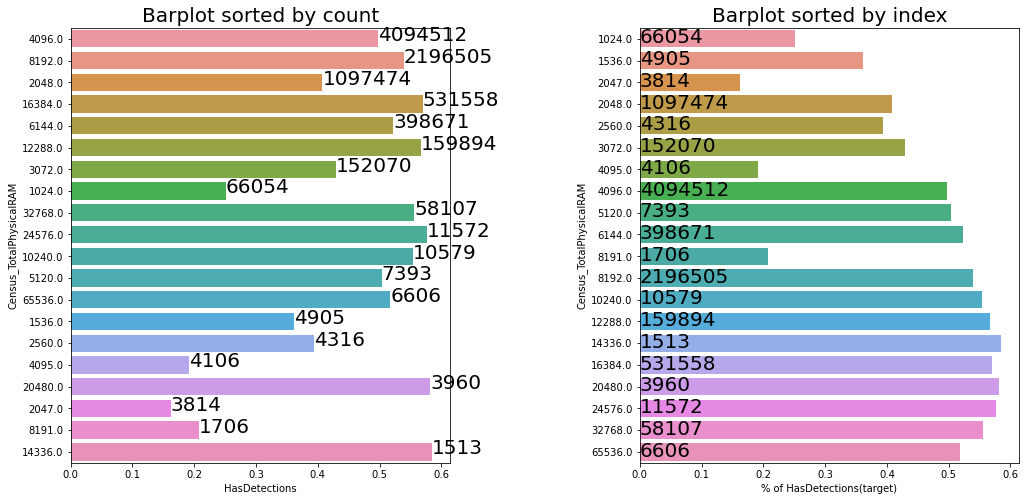

In [33]:
plot_category_percent_of_target_for_numeric(col)

### Data Visualization

#### Show how many malware frequeuncy is impacted by Malware

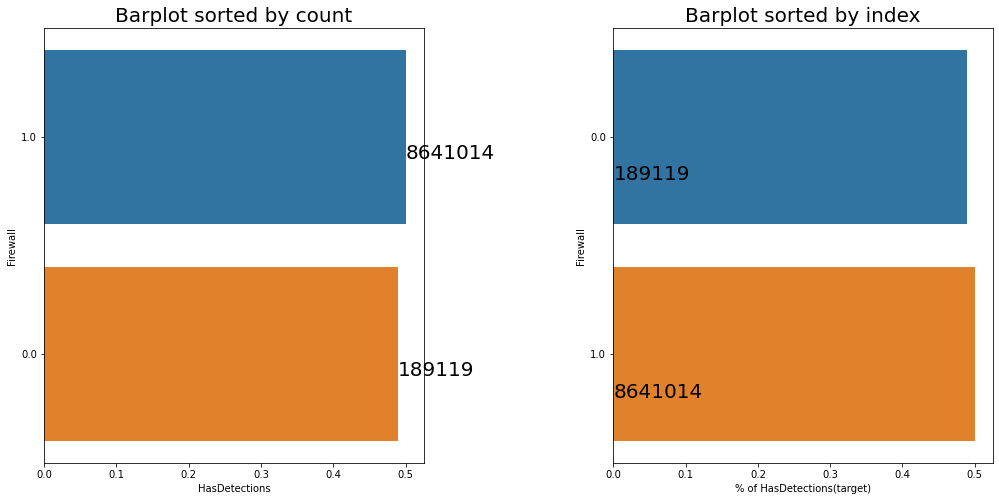

In [34]:
col = numeric_features[19]
plot_category_percent_of_target_for_numeric(col)

#### Counts of "Census_InternalPrimaryDiagonalDisplaySizeInInches" by top 10 categories for touch devices

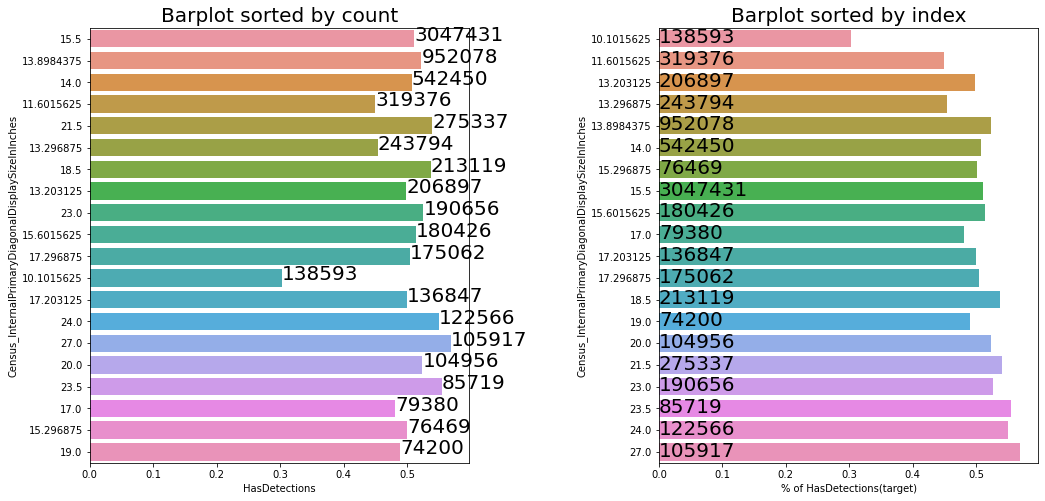

In [35]:
col = numeric_features[30]
plot_category_percent_of_target_for_numeric(col)

In [36]:
size = train['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts().head(10).index

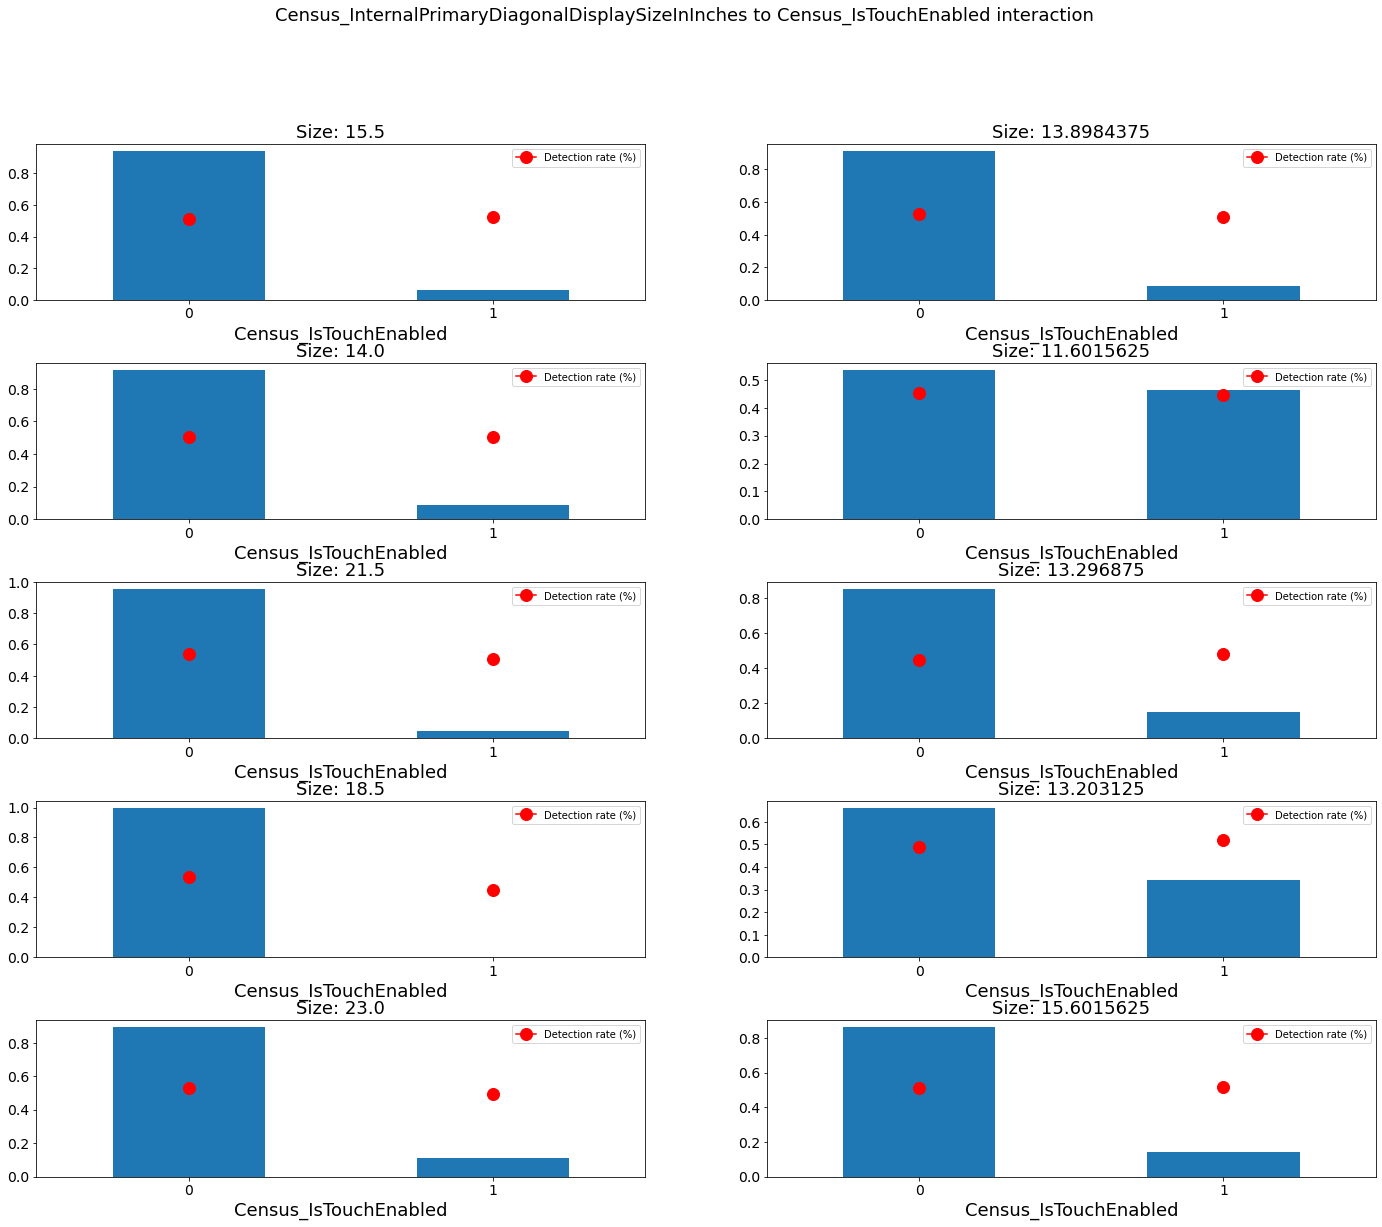

In [37]:
fig, axes = plt.subplots(nrows=int(len(size) / 2), ncols=2, figsize=(24,19))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
for i in range(len(size)):
    train.loc[train['Census_InternalPrimaryDiagonalDisplaySizeInInches'] == size[i], 'Census_IsTouchEnabled'].value_counts(True, dropna=False).plot(kind='bar', rot=0, ax=axes[i // 2,i % 2], fontsize=14).set_xlabel('Census_IsTouchEnabled', fontsize=18)
    axes[i // 2,i % 2].plot(0, train.loc[(train['Census_InternalPrimaryDiagonalDisplaySizeInInches'] == size[i]) & (train['Census_IsTouchEnabled'] == 0), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].plot(1, train.loc[(train['Census_InternalPrimaryDiagonalDisplaySizeInInches'] == size[i]) & (train['Census_IsTouchEnabled'] == 1), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].legend(['Detection rate (%)'])
    axes[i // 2,i % 2].set_title('Size: ' + str(size[i]), fontsize=18)
fig.suptitle('Census_InternalPrimaryDiagonalDisplaySizeInInches to Census_IsTouchEnabled interaction', fontsize=18);

#### Counts of "Census_InternalBatteryType" by top 2 categories for Malware Detection %

In [38]:
battery_type = train['Census_InternalBatteryType'].value_counts().head(10).index

In [39]:
battery_type

CategoricalIndex(['lion', 'li-i', '#', 'lip', 'liio', 'li p', 'li', 'nimh',
                  'real', 'bq20'],
                 categories=['#', 'bq20', 'li', 'li p', 'li-i', 'liio', 'lion', 'lip', ...], ordered=False, dtype='category')

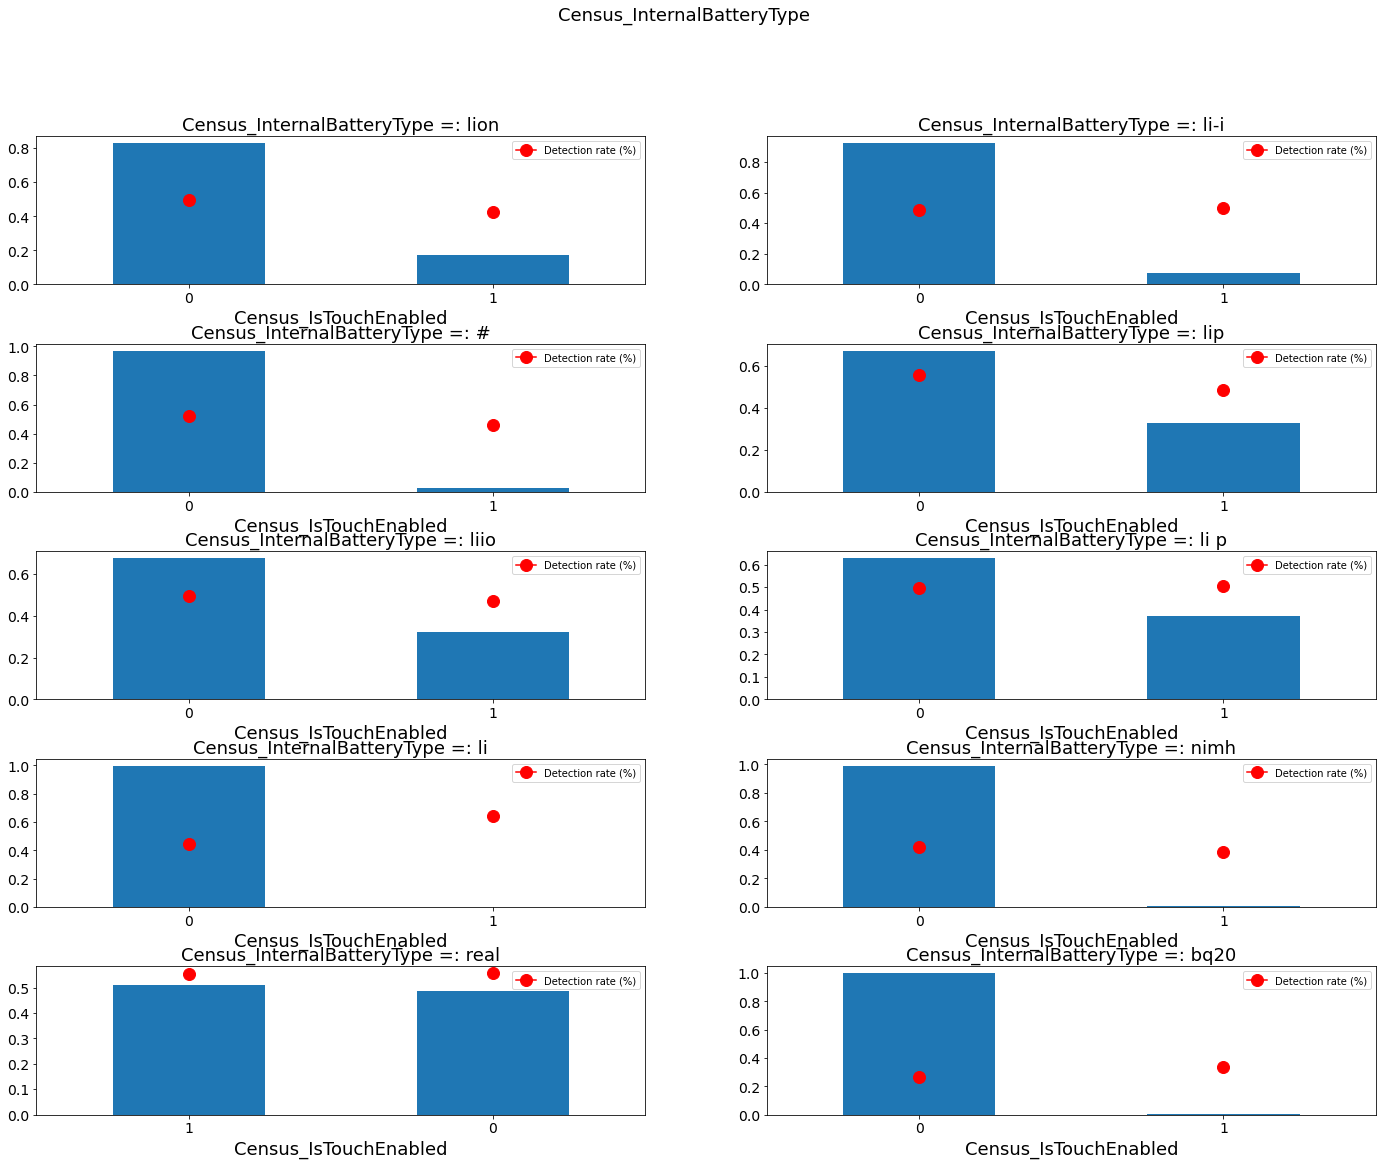

In [40]:
fig, axes = plt.subplots(nrows=int(len(battery_type) / 2), ncols=2, figsize=(24,18))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
for i in range(len(battery_type)):
    train.loc[train['Census_InternalBatteryType'] == battery_type[i], 'Census_IsTouchEnabled'].value_counts(True, dropna=False).plot(kind='bar', rot=0, ax=axes[i // 2,i % 2], fontsize=14).set_xlabel('Census_IsTouchEnabled', fontsize=18)
    axes[i // 2,i % 2].plot(0, train.loc[(train['Census_InternalBatteryType'] == battery_type[i]) & (train['Census_IsTouchEnabled'] == 0), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].plot(1, train.loc[(train['Census_InternalBatteryType'] == battery_type[i]) & (train['Census_IsTouchEnabled'] == 1), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].legend(['Detection rate (%)'])
    axes[i // 2,i % 2].set_title('Census_InternalBatteryType =: ' + str(battery_type[i]), fontsize=18)
fig.suptitle('Census_InternalBatteryType', fontsize=18);

#### Counts of "Census_OSSkuName" by top 10 categories for Non Touch Devices

In [41]:
OSSkuName = train['Census_OSSkuName'].value_counts().head(10).index

In [42]:
OSSkuName

CategoricalIndex(['CORE', 'PROFESSIONAL', 'CORE_SINGLELANGUAGE',
                  'CORE_COUNTRYSPECIFIC', 'EDUCATION', 'ENTERPRISE',
                  'PROFESSIONAL_N', 'ENTERPRISE_S', 'STANDARD_SERVER',
                  'CLOUD'],
                 categories=['CLOUD', 'CORE', 'CORE_COUNTRYSPECIFIC', 'CORE_N', 'CORE_SINGLELANGUAGE', 'EDUCATION', 'EDUCATION_N', 'ENTERPRISE', ...], ordered=False, dtype='category')

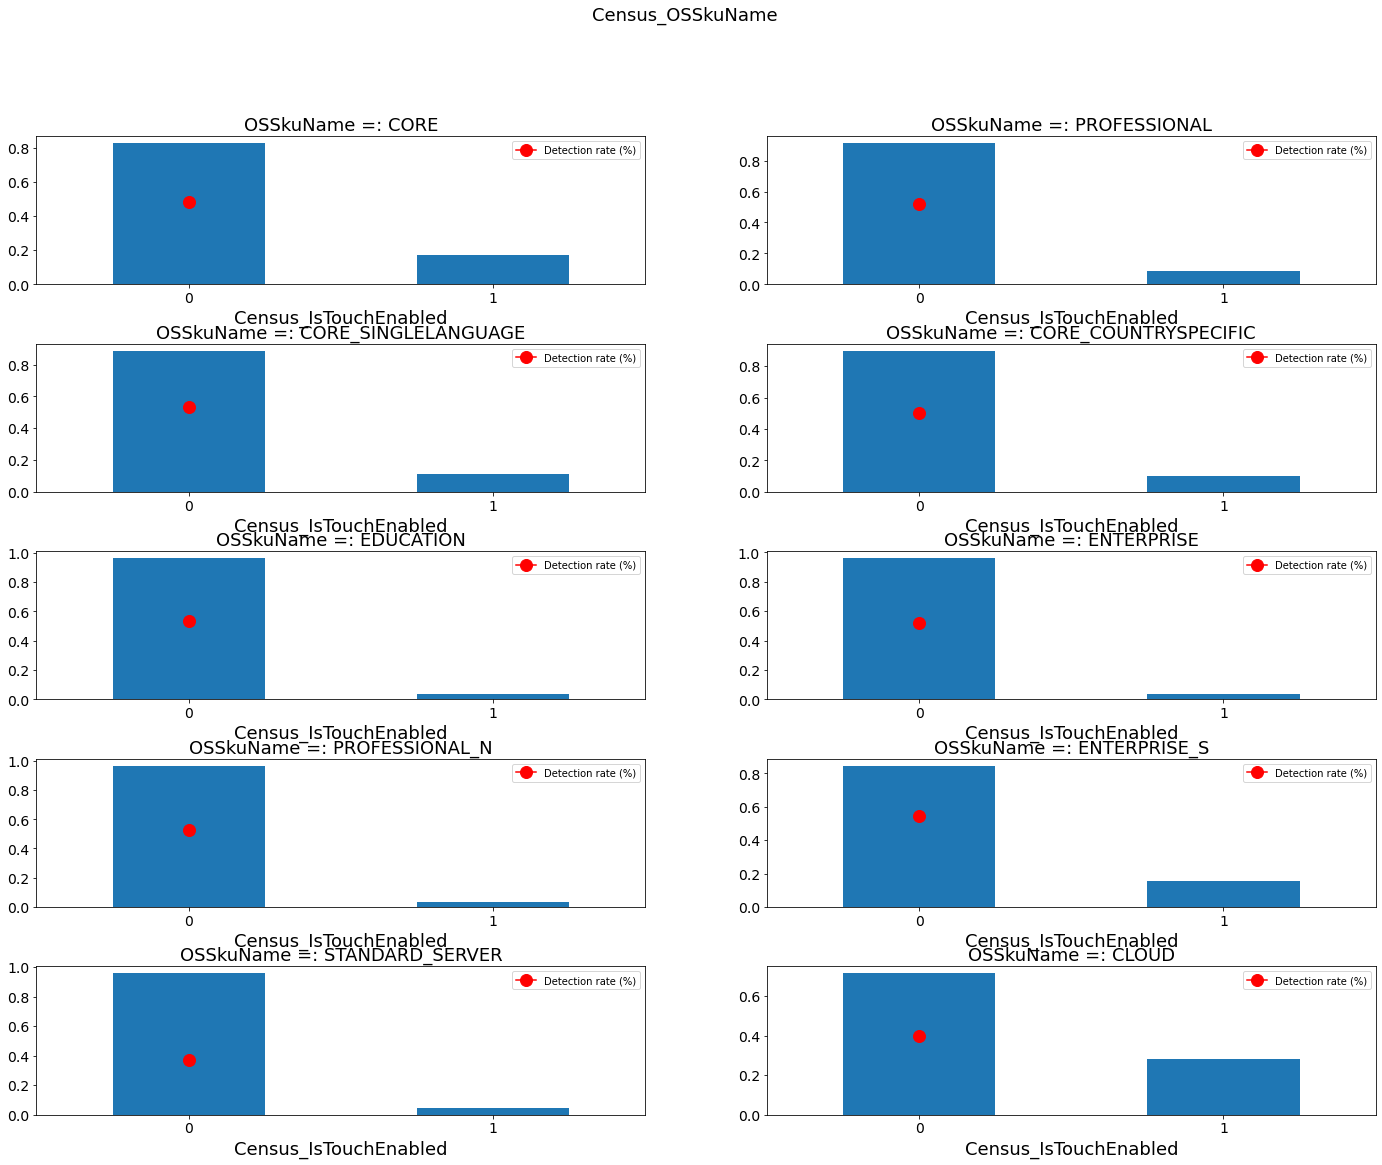

In [43]:
fig, axes = plt.subplots(nrows=int(len(OSSkuName) / 2), ncols=2, figsize=(24,18))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
for i in range(len(OSSkuName)):
    train.loc[train['Census_OSSkuName'] == OSSkuName[i], 'Census_IsTouchEnabled'].value_counts(True, dropna=False).plot(kind='bar', rot=0, ax=axes[i // 2,i % 2], fontsize=14).set_xlabel('Census_IsTouchEnabled', fontsize=18)
    axes[i // 2,i % 2].plot(0, train.loc[(train['Census_OSSkuName'] == OSSkuName[i]) & (train['Census_IsTouchEnabled'] == 0), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    #axes[i // 2,i % 2].plot(1, train.loc[(train['Census_OSSkuName'] == OSSkuName[i]) & (train['Census_IsTouchEnabled'] == 1), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].legend(['Detection rate (%)'])
    axes[i // 2,i % 2].set_title('OSSkuName =: ' + str(OSSkuName[i]), fontsize=18)
fig.suptitle('Census_OSSkuName', fontsize=18);

#### "Census_ProcessorCoreCount" by top 8 categories for Touch enabled and Non Touch enabled Detections %

In [46]:
Processor_ver = train['Census_ProcessorCoreCount'].value_counts().head(8).index

In [47]:
Processor_ver

Float64Index([4.0, 2.0, 8.0, 12.0, 1.0, 6.0, 16.0, 3.0], dtype='float64')

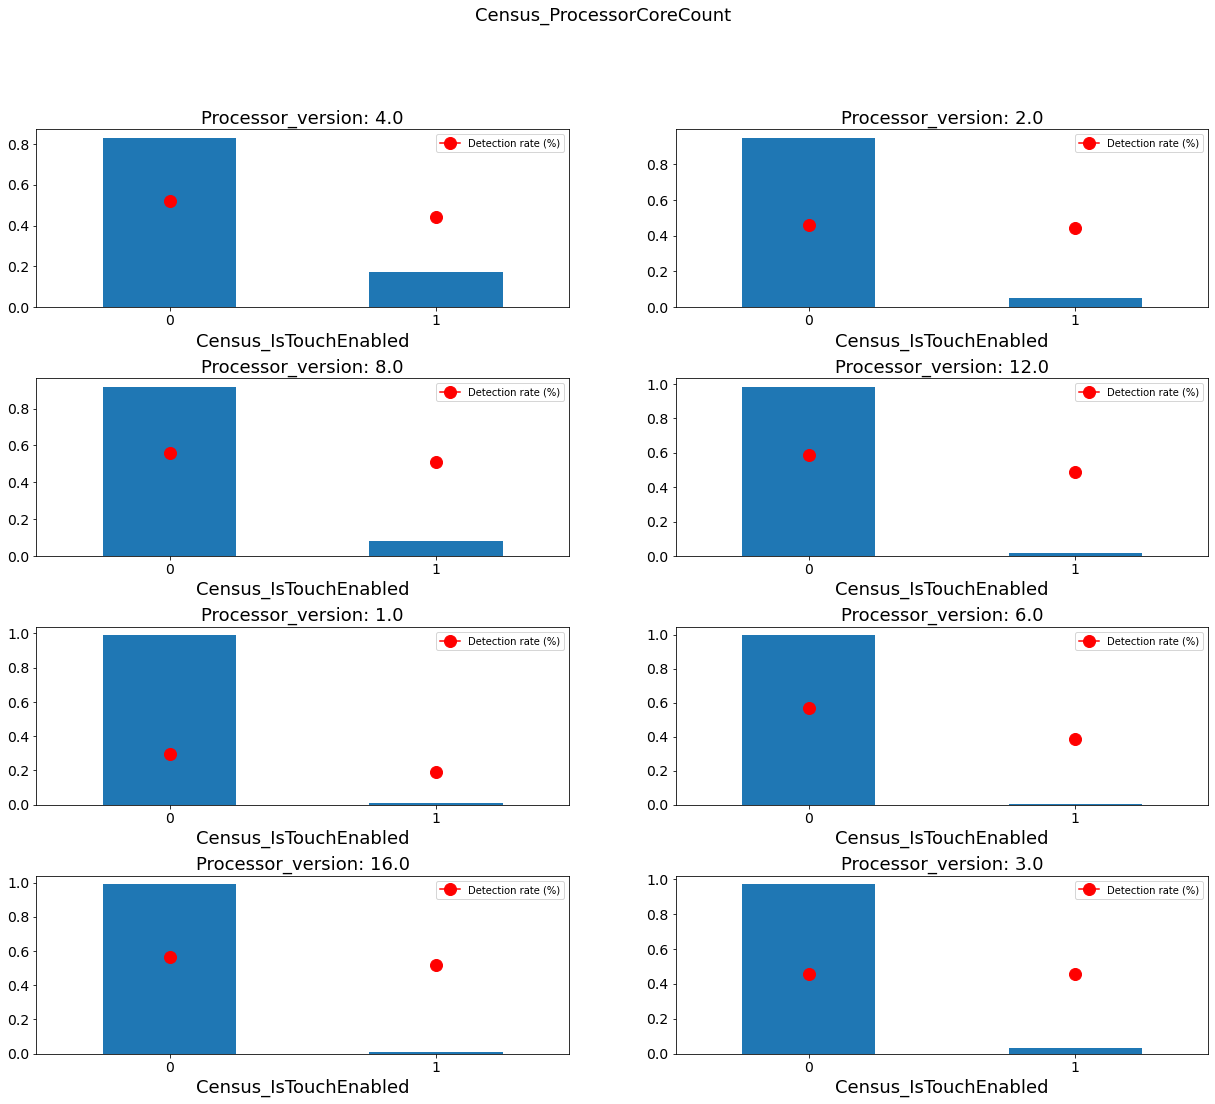

In [48]:
fig, axes = plt.subplots(nrows=int(len(Processor_ver) / 2), ncols=2, figsize=(21,17))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
for i in range(len(Processor_ver)):
    train.loc[train['Census_ProcessorCoreCount'] == Processor_ver[i], 'Census_IsTouchEnabled'].value_counts(True, dropna=False).plot(kind='bar', rot=0, ax=axes[i // 2,i % 2], fontsize=14).set_xlabel('Census_IsTouchEnabled', fontsize=18)
    axes[i // 2,i % 2].plot(0, train.loc[(train['Census_ProcessorCoreCount'] == Processor_ver[i]) & (train['Census_IsTouchEnabled'] == 0), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].plot(1, train.loc[(train['Census_ProcessorCoreCount'] == Processor_ver[i]) & (train['Census_IsTouchEnabled'] == 1), 'HasDetections'].value_counts(True, dropna=False)[1], marker='.', color="r", markersize=24)
    axes[i // 2,i % 2].legend(['Detection rate (%)'])
    axes[i // 2,i % 2].set_title('Processor_version: ' + str(Processor_ver[i]), fontsize=18)
fig.suptitle('Census_ProcessorCoreCount', fontsize=18);

### categorical and the numerical columns

In [23]:
categorical_columns = list(train_final.loc[:, train_final.dtypes =="category"].columns)

In [24]:
categorical_columns

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [25]:
numerical_and_binary_columns = list(train_final.loc[:, train_final.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns
numerical_columns

['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootE

In [26]:
categorical_columns.remove("MachineIdentifier")
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [27]:
binary_columns = []
for col in (numerical_and_binary_columns):
    if train_final[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

In [28]:
binary_columns

['Census_IsFlightingInternal',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'HasDetections']

In [29]:
categories_list= []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))
categories_list

[20, 32, 4]

In [30]:
categories_df = pd.DataFrame(categories_list, index=["Categorical_Features", "Numerical_Features", "Binary_Features"])

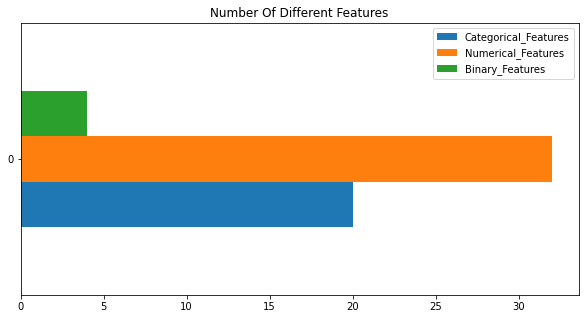

In [31]:
categories_df = categories_df.transpose().plot(kind="barh", figsize=(10, 5), title="Number Of Different Features")

In [32]:
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [33]:
train_final.head(5)

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,...,NaN,NaN,628.0,36144.0,0,NaN,0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,...,NaN,NaN,628.0,57858.0,0,NaN,0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,...,NaN,NaN,142.0,52682.0,0,NaN,0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,...,NaN,NaN,355.0,20050.0,0,NaN,0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,...,0.0,0.0,355.0,19844.0,0,0.0,0,0.0,1.0,1


In [34]:
train_final.shape

(8921483, 57)

In [35]:
train_final.shape

(8921483, 57)

In [36]:
# Filling NA values with the statistical Mode
modes = train_final.mode()

for col in train_final.columns:
    train_final[col] = np.where(train_final[col].isnull(), modes[col], train_final[col])

del modes

In [ ]:
# Label & OneHot Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns,train_final)

#### Checking correlation of variables with the target

In [64]:
train_final[train_final.columns[1:]].corr()['HasDetections'][:].sort_values(ascending=False)

HasDetections                                        1.000000
AVProductStatesIdentifier                            0.117404
Census_TotalPhysicalRAM                              0.057069
Census_ProcessorCoreCount                            0.054299
AvSigVersion                                         0.054166
Wdft_IsGamer                                         0.053891
EngineVersion                                        0.052190
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.034240
Census_OSVersion                                     0.032495
Census_InternalPrimaryDisplayResolutionHorizontal    0.031920
Census_OSBuildNumber                                 0.029486
AppVersion                                           0.025905
Census_OSSkuName                                     0.025726
OsBuild                                              0.024754
Census_OSEdition                                     0.024705
Census_ProcessorModelIdentifier                      0.022711
Census_I

<Figure size 1728x864 with 0 Axes>

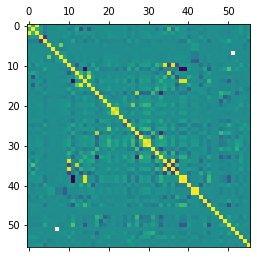

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plt.matshow(train_final.corr())
plt.show()

In [38]:
#Checking skewness in data

In [39]:
# A skewness value of 0 in the output denotes a symmetrical distribution of values
# A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.
# A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

In [40]:
skew = train_final.skew(axis = 0, skipna = True)

In [47]:
skew.head(57)

EngineVersion                                          -4.770853
AppVersion                                             -0.415893
AvSigVersion                                           -3.817663
AVProductStatesIdentifier                              -2.080102
AVProductsInstalled                                          NaN
CountryIdentifier                                       0.153260
CityIdentifier                                         -0.018759
OrganizationIdentifier                                       NaN
GeoNameIdentifier                                            NaN
LocaleEnglishNameIdentifier                            -0.611105
OsBuild                                                -1.974445
OsSuite                                                -0.509386
OsPlatformSubRelease                                    0.573506
OsBuildLab                                              1.696557
SkuEdition                                              0.176346
IeVerIdentifier          

In [48]:
train_final.drop(["Census_PrimaryDiskTotalCapacity"], axis = 1, inplace = True)

In [49]:
train_final.head(5)

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,65,59,7800,53447.0,1.0,29.0,128035.0,18.0,35.0,...,0.0,0.0,628.0,36144.0,0.0,0.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,55,26,6303,53447.0,1.0,93.0,1482.0,18.0,119.0,...,NaN,NaN,628.0,57858.0,0.0,NaN,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,65,59,7671,53447.0,1.0,86.0,153579.0,18.0,64.0,...,NaN,NaN,142.0,52682.0,0.0,NaN,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,65,59,7722,53447.0,1.0,88.0,20710.0,NaN,117.0,...,NaN,NaN,355.0,20050.0,0.0,NaN,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,65,59,7681,53447.0,1.0,18.0,37376.0,NaN,277.0,...,0.0,0.0,355.0,19844.0,0.0,0.0,0.0,0.0,1.0,1.0


In [50]:
train_final.dtypes

MachineIdentifier                                     object
EngineVersion                                          int64
AppVersion                                             int64
AvSigVersion                                           int64
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
CountryIdentifier                                    float64
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                          float64
OsBuild                                              float64
OsSuite                                              float64
OsPlatformSubRelease                                   int64
OsBuildLab                                             int64
SkuEdition                                             int64
IeVerIdentifier         

In [51]:
train_final.drop(columns=['MachineIdentifier'], inplace=True)

In [52]:
train_final.dtypes

EngineVersion                                          int64
AppVersion                                             int64
AvSigVersion                                           int64
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
CountryIdentifier                                    float64
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                          float64
OsBuild                                              float64
OsSuite                                              float64
OsPlatformSubRelease                                   int64
OsBuildLab                                             int64
SkuEdition                                             int64
IeVerIdentifier                                      float16
SmartScreen             

In [53]:
train_final.head(5)

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,65,59,7800,53447.0,1.0,29.0,128035.0,18.0,35.0,-85.0,...,0.0,0.0,628.0,36144.0,0.0,0.0,0.0,0.0,10.0,0.0
1,55,26,6303,53447.0,1.0,93.0,1482.0,18.0,119.0,64.0,...,NaN,NaN,628.0,57858.0,0.0,NaN,0.0,0.0,8.0,0.0
2,65,59,7671,53447.0,1.0,86.0,153579.0,18.0,64.0,49.0,...,NaN,NaN,142.0,52682.0,0.0,NaN,0.0,0.0,3.0,0.0
3,65,59,7722,53447.0,1.0,88.0,20710.0,NaN,117.0,115.0,...,NaN,NaN,355.0,20050.0,0.0,NaN,0.0,0.0,3.0,1.0
4,65,59,7681,53447.0,1.0,18.0,37376.0,NaN,277.0,75.0,...,0.0,0.0,355.0,19844.0,0.0,0.0,0.0,0.0,1.0,1.0


In [54]:
#Save the files:
train_final.to_csv('train_data.csv',index=False)

In [55]:
import boto3
import re

# Define file names:
bucketNM = '18-09-test'
TrainFile = r'LR/LRtrain_data.csv'
Valfile = r'LR/LRVal.csv'
ModelFolder = r'LR/model/'

# Mention file location:
s3ModelOutput= r's3://{0}/{1}'.format(bucketNM,ModelFolder)
s3Train = r's3://{0}/{1}'.format(bucketNM,TrainFile)
s3Val = r's3://{0}/{1}'.format(bucketNM,Valfile)

In [56]:
with open('train_data.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucketNM).Object(TrainFile).upload_fileobj(f)

In [38]:
### Refer to next notebook for XGBoost Model